In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from pdb import set_trace
from copy import copy

import matplotlib.image as mpimg

In [5]:
'''
Breakout Solution

Useful functions

'''

def FD(x, y, plot_FD = False, y_lim = None):

    N = len(x)

    z = x + y*1j

    Z = np.fft.fft(z)
        
    # For very noisy data d would appear longer than the 
    # the actual separation between 2 adjacent points for the
    # "true" shape underneath.
    d_complex = np.gradient(z)
    d = np.abs(d_complex).mean()
    print('Average distance bewteen adjacent points:{}'.format(d))
    
    
    print('Spatial interval: {:.4f}'.format(d))
    k = np.fft.fftfreq(len(z), d = d)
    k_lo = np.abs(k[np.argsort(np.abs(k))][1])

    if plot_FD:
        plt.figure()
        plt.title('FD real')
        plt.plot(k, Z.real, 'b.')
        plt.xlabel('k')
        plt.ylabel('Re[FD]')
        if y_lim != None:
            plt.ylim([-y_lim, y_lim])
        plt.figure()
        plt.title('FD imag')
        plt.plot(k, Z.imag, 'g.')
        plt.xlabel('k')
        plt.ylabel('Im[FD]')
        if y_lim != None:
            plt.ylim([-y_lim, y_lim])

    return Z, k, k_lo

def filt_FD(Z, k, k_keep, no_zeroth = False):

    filt = np.abs(k) <= k_keep
    if no_zeroth:
        filt *= (k != 0)
    print("FD components kept:", filt.sum())
    return Z*filt, k*filt



# I'm giving away the following 2 functions for free!
def recover_shape(Z):
    z_rec = np.fft.ifft(Z)

    x_rec = z_rec.real
    y_rec = z_rec.imag
    
    return x_rec, y_rec


def plot_shape(x, y, plot_style = 'b.', title = 'Recovered Shape'):
    fig = plt.figure(figsize = (5, 5))
    ax = fig.add_subplot(111)  
    ax.set_title(title)
    try:
        xlen = len(x)
    except:
        ax.plot(x, y, plot_style)
    else:
        for i in range(xlen):
            ax.plot(x[i], y[i], plot_style)


In [6]:
'''

Check to see if the functinos in breakout1 work.

To emphasize:

- 0th order: average (or sum, depending on DFT convention adopted) 
of all points

'''
#************************************Main Program*************************************
# Note: this is how most programs should be written.
Z, k, k_lo = FD(x, y, plot_FD=True, y_lim = 10)
print(k_lo)
# Note that keeping up to k_lo or 2*k_lo doesn't seem to make a difference
# and this is because the shape doesn't concave in one direction or another
Z_filt, k = filt_FD(Z, k, 20*k_lo, no_zeroth=True)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)


NameError: name 'x' is not defined

## The Order of the Points Matters

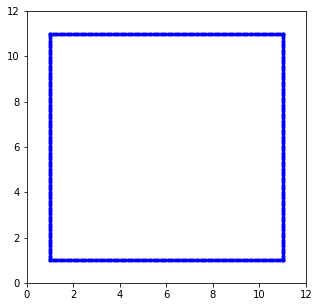

In [7]:
%matplotlib inline
'''
Demonstrate what happens when the order of the points is wrong.

'''

num_pts = 100
xlo, ylo = 1, 1
xhi, yhi = 11, 11
sz = xhi - xlo

x1 = np.linspace(xlo, xhi, num_pts)
x2 = np.ones(num_pts)*xhi
# Note the order of the points is WRONG (on purpose)!
x3 = np.linspace(xlo, xhi, num_pts)

x4 = np.ones(num_pts)
x_wrong = np.concatenate((x1, x2, x3, x4))

y1 = np.ones(num_pts)
y2 = np.linspace(ylo, yhi, num_pts)
y3 = np.ones(num_pts)*yhi
y4 = np.linspace(yhi, ylo, num_pts)
y_wrong = np.concatenate((y1, y2, y3, y4))

plt.figure(figsize = (5, 5))
plt.plot(x_wrong, y_wrong, 'b.')
plt.axis([0, xhi + 1, 0, yhi + 1])
plt.show()

Average distance bewteen adjacent points:0.1494962248424825
Spatial interval: 0.1495
0.0167228303098
FD components kept: 7


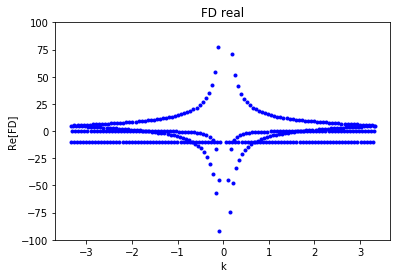

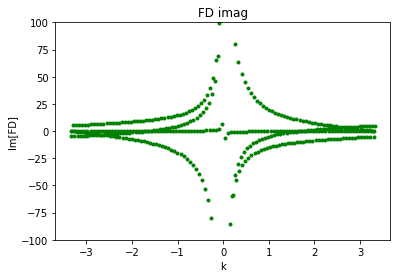

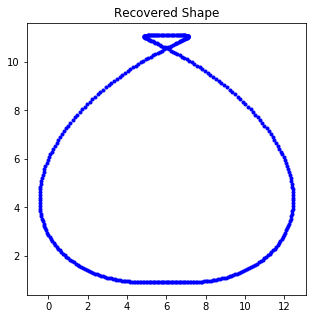

In [8]:
'''

What happens when the ordering of the points does NOT follow the flow!!!

'''
#************************************Main Program*************************************
# Note: this is how most programs should be written.
Z, k, k_lo = FD(x_wrong, y_wrong, plot_FD=True, y_lim = 100)
print(k_lo)
Z_filt, k = filt_FD(Z, k, 3*k_lo)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)


## Use Contour Plots 
## (The points are always arranged in the right order)

contour levels [ 0.6]
len(CS.collections): 1
number of contour path 1


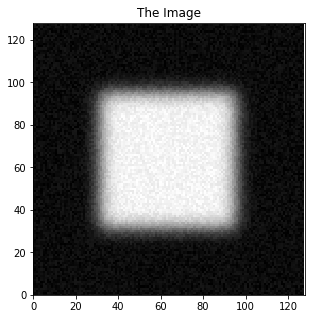

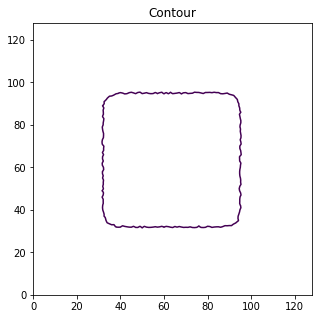

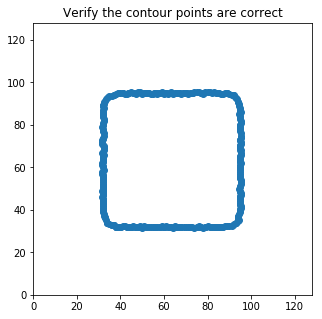

In [9]:
%matplotlib inline
'''


To get the order of the points right the first time: Using contours.

- Advantage: Get the order right and can deal with concave polygons and polygons with holes 
  very easily (compared with edge detector)
- Disadvantage: Harder to deal with a noisy image (compared with edge detector)
- For OCR with hi-def images, no problem -- for more sophisticated OCR techniques, 
  next semester!

'''

# ----------> Below are two new imports <------------
from scipy import ndimage as ndi

# Generate noisy image of a square
# Note: this is NOT a square shape as we did above
# but a 2D image!
im_dim = 128
im = np.zeros((im_dim, im_dim))
im[32:-32, 32:-32] = 1

# rotation
#im = ndi.rotate(im, 15, mode='constant')
# Gaussian smoothing
im = ndi.gaussian_filter(im, 4)
# Add noise -- this is applied to the square in the middle
# and the background
im += 0.1*np.random.random(im.shape)


plt.figure(figsize = (5, 5))
plt.axis((0, im_dim, 0, im_dim))
plt.imshow(im, cmap=plt.cm.gray)
plt.title('The Image')

# The transpose is needed because of the opposite convention 
# adopted by matplotlib and numpy
# (no an issue here since it's a square).
x = np.arange(im.T.shape[0])
y = np.arange(im.T.shape[1])
# make 2D coordinate grid 
X, Y = np.meshgrid(x, y)

# Find and plot contours
plt.figure(figsize = (5, 5))
plt.axis((0, im_dim, 0, im_dim))

plt.title('Contour')
# the last integter specifies how many contours you want
# let's use 1 here.  But try 3 and see for yourself.
n_countours = 1
CS = plt.contour(X, Y, im, 1)
levels = CS.levels
print('contour levels', levels)

# Find the (x, y) coodinates of the contour lines.
print('len(CS.collections):', len(CS.collections))
cs_paths = CS.collections[0].get_paths()

print('number of contour path', len(cs_paths))
p = cs_paths[0]
v = p.vertices
x_arr = v[:,0]
y_arr = v[:,1]

plt.figure(figsize = (5, 5))
plt.axis((0, im_dim, 0, im_dim))
plt.title("Verify the contour points are correct")
plt.scatter(x_arr, y_arr)

plt.show()


## A More Interesting Example: The Letter "E"

contour level [ 150.]
number of contour path 1


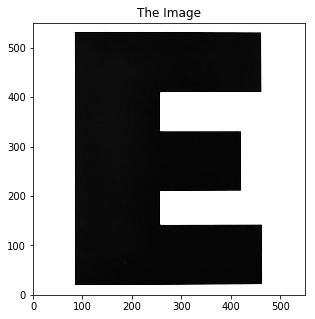

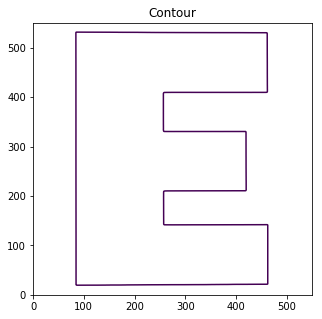

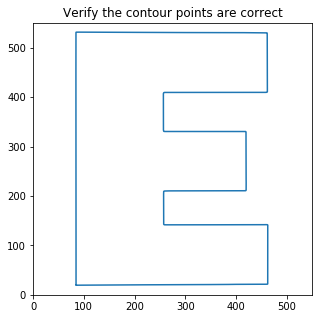

In [10]:
%matplotlib inline
'''

Use the letter "E" as the example case.

Given an image of a letter, the code below will find it's shape (complext) vector 
by using contour.


'''

from skimage import feature


im = mpimg.imread('letterE.jpg')

# Take only one of RGB channels
im = im[:, :, 0]


plt.figure(figsize = (5, 5))
plt.axis((0, 550, 0, 550))
plt.imshow(im, cmap=plt.cm.gray)
plt.title('The Image')
# Note: The transpose operation is needed simply because matplotlib and numpy adopted
# opposite conventions
xim = np.arange(im.T.shape[0])
yim = np.arange(im.T.shape[1])

# make 2D coordinate grid as we have done before
X, Y = np.meshgrid(xim, yim)

# Find and plot contours
plt.figure(figsize = (5, 5))
plt.axis((0, 550, 0, 550))

plt.title('Contour')
CS = plt.contour(X, Y, im, 1)
levels = CS.levels
print('contour level', levels)

# Find the (x, y) coodinates of the contour lines.
cs_paths = CS.collections[0].get_paths()

# we should get 1 below because there is only one contour
print('number of contour path', len(cs_paths))
p = cs_paths[0]
v = p.vertices
x = v[:,0]
y = v[:,1]

plt.figure(figsize = (5, 5))
plt.axis((0, 550, 0, 550))
plt.title("Verify the contour points are correct")
plt.plot(x, y)

plt.show()


## Breakout Exercise 2: 
- ### Find the FD's of the letter E by using the function FD() that you wrote above.
- ### Use FD's up to 10\*k_lo and plot the recovered image
- ### How many FD's are needed for you to recognize it's the letter "E"?


Average distance bewteen adjacent points:0.9953126687152395
Spatial interval: 0.9953
FD components kept: 21


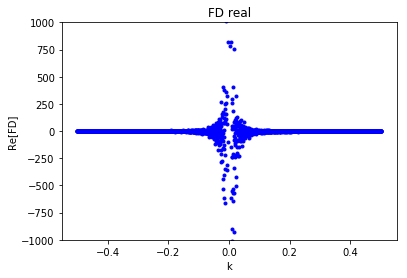

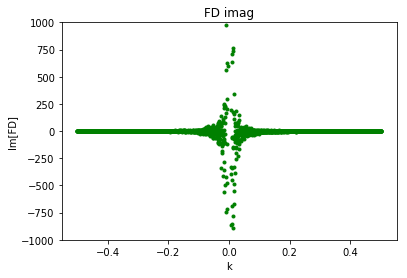

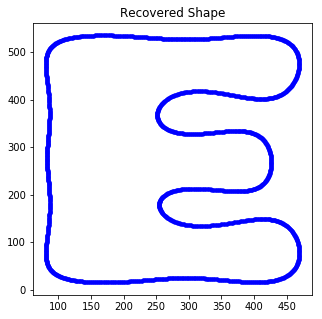

In [17]:
Z, k, k_lo = FD(x, y, plot_FD = True, y_lim = 1000)

Z_filt, k = filt_FD(Z, k, 10*k_lo)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)


##  Breakout 3: Write a function extract_shape_v0(im_file, blowup = 1., plot_img = False, plot_contour = False, plot_contour_pts = False)

- ### should check whether the image has a single and mutliple channels.  If the later, take the 0th (usu. R) channels

- ### should have the ability of blowing up the image by a factor specified by blowup.

- ### returns the x and y arrays of the outline (contour) of the shape.

- ### test it on the image of the letter "E", by plotting y against x.  You should see the outline of "E".


In [32]:
def extract_shape_v0(im_file, blowup=1., plot_img=False, plot_contour=False, plot_coutour_pts=False):
    %matplotlib inline

    from skimage import feature

    im = mpimg.imread(im_file)

    if len(im.shape) > 2:
        # Take only one of RGB channels
        im = im[:, :, 0]
        print("im shape: ", im.shape)

    if plot_img:
        plt.figure(figsize = (5, 5))
        plt.axis((0, 550, 0, 550))
        plt.imshow(im, cmap=plt.cm.gray)
        plt.title('The Image')
        
    # Note: The transpose operation is needed simply because matplotlib and numpy adopted
    # opposite conventions
    xim = np.arange(im.T.shape[0]) * blowup
    yim = np.arange(im.T.shape[1]) * blowup

    # make 2D coordinate grid as we have done before
    X, Y = np.meshgrid(xim, yim)
        
    # Find and plot contours
    plt.figure(figsize = (5, 5))
    plt.axis((0, 550, 0, 550))

    plt.title('Contour')
    CS = plt.contour(X, Y, im, 1)
    levels = CS.levels
    print('contour level', levels)
    if not plot_contour:
        plt.close()

    # Find the (x, y) coodinates of the contour lines.
    cs_paths = CS.collections[0].get_paths()

    # we should get 1 below because there is only one contour
    print('number of contour path', len(cs_paths))
    p = cs_paths[0]
    v = p.vertices
    x = v[:,0]
    y = v[:,1]

    if plot_coutour_pts:
        plt.figure(figsize = (5, 5))
        plt.axis((0, 550, 0, 550))
        plt.title("Verify the contour points are correct")
        plt.plot(x, y)

    plt.show()
    
    return x, y


im shape:  (550, 550)
contour level [ 150.]
number of contour path 1


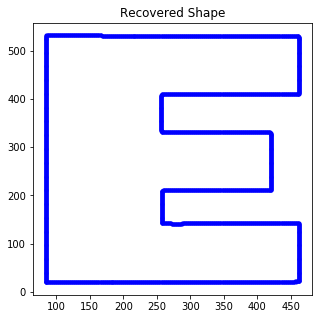

In [33]:
'''Test to see if the function extract_shape_v0() works'''
x, y = extract_shape_v0('letterE.jpg')
plot_shape(x, y)


## The Meaning of the Terms in FD -- Order by Order

### The descriptors $Z[k]$ (or $Z[n]$) (Fourier Desriptors, or FD's) are components of a shape in frequency space (or more precisely, "$k$-space"): Components with low $k$ provides low frequency information -- an approximation to the shape, and components with higher frequencies provide details.

### 1. Translational Invariance.  For $k = 0$, $Z[k]$ represents the position of the center of gravity of the shape. This term is not interesting for the shape description. If one does an inverse transform without this term, all recovered shapes will be centered on the same point ( (0, 0) ) regardless of the actual position of the original shape.



### 2. Size Invariance.  The first frequency component, Z[k\_lo] and Z[-k\_lo] (or in terms of indices, n, Z[1] and Z[-1]), describes the size of the shape. If all the other components are set to zero, the shape becomes an ellipse (actually, a N-sided polygon).  The product of these two terms is proportional to the area of the ellipse (basically area = $\pi a b$ -- you can think of the these two terms as being related to the major and minor axes of an ellipse.


## ----------------Below is where the actual *shape* information is contained -------------------

### 3. Convavity.  The seond frequency components, Z[2\*k\_lo] and Z[-2\*k\_lo] (or k[2] and k[-2]), together show which way the shape bends ("concavity").



### 4. The other frequency components will make higher frequency alterations.  



### 5. The phase of Z[k] describes the place where the higher order corrections are applied -- just like in linear FT, the phase in sin/cos will affect where the corrections will be applied.  

### 6. Rotational Invariance.  Related to \#5, multiplying Z[k] by an additional phase factor amounts to rotating the shape.  This means |Z[k]|'s are the same however the shape is oriented.


(Adapted from http://www.tsi.telecom-paristech.fr/pages/enseignement/ressources/beti/descript_fourier/Part1.htmlf)

im shape:  (550, 550)
contour level [ 150.]
number of contour path 1
Average distance bewteen adjacent points:0.9953126687152395
Spatial interval: 0.9953
FD components kept: 21


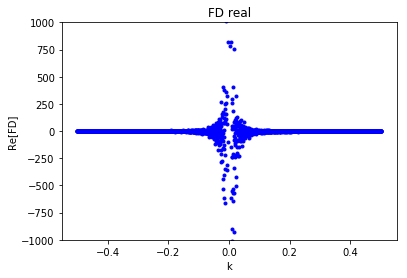

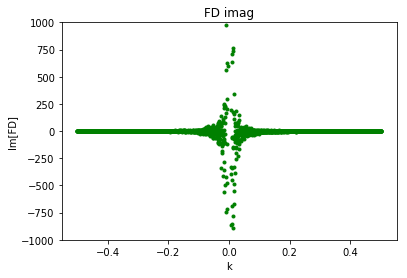

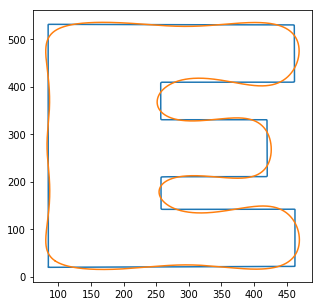

In [34]:
'''
1. Translational Invariance Example
'''

x, y = extract_shape_v0('letterE.jpg')
Z, k, k_lo = FD(x, y, plot_FD=True, y_lim = 1000)

order = 10
# Observe the effects of whether or not we include the zeroth order term.
Z_filt, k_filt = filt_FD(Z, k, order*k_lo, no_zeroth = False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure(figsize = (5, 5))
plt.plot(x, y)
plt.plot(x_rec, y_rec)
plt.show()


im shape:  (550, 550)
contour level [ 150.]
number of contour path 1
Average distance bewteen adjacent points:9.953126687152395
Spatial interval: 9.9531
FD components kept: 21


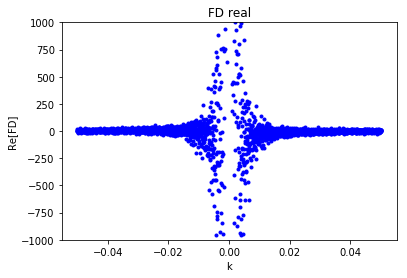

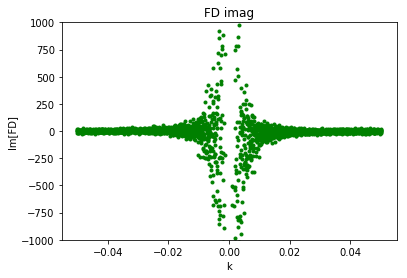

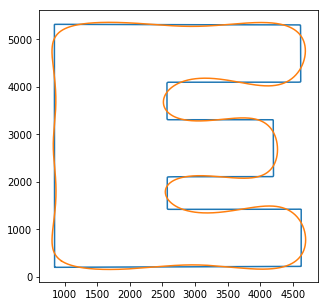

In [35]:
'''
2. Size Invariance

- without normalization
'''

x_L, y_L = extract_shape_v0('letterE.jpg', blowup = 10.)
Z, k, k_lo = FD(x_L, y_L, plot_FD=True, y_lim = 1000)

order = 10
Z_filt, k_filt = filt_FD(Z, k, order*k_lo)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure(figsize = (5, 5))
plt.plot(x_L, y_L)
plt.plot(x_rec, y_rec)
plt.show()


im shape:  (550, 550)
contour level [ 150.]
number of contour path 1
Average distance bewteen adjacent points:9.953126687152395
Spatial interval: 9.9531
FD components kept: 21
im shape:  (550, 550)
contour level [ 150.]
number of contour path 1
Average distance bewteen adjacent points:0.9953126687152395
Spatial interval: 0.9953
FD components kept: 21


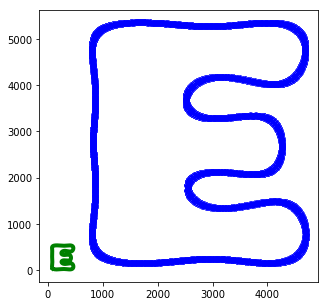

In [43]:
'''
2. Size Invariance

Comparing two E's with very different sizes: Without and with normalization. 
'''

def size_norm(Z):
    return Z/np.sqrt( np.abs(Z[1])*np.abs(Z[-1]) )

x_L, y_L = extract_shape_v0('letterE.jpg', blowup = 10.)
Z, k, k_lo = FD(x_L, y_L)

order = 10
Z_filt, k_filt = filt_FD(Z, k, order*k_lo)
#normalization
#Z_filt = size_norm(Z_filt)
x_L_rec, y_L_rec = recover_shape(Z_filt)


x, y = extract_shape_v0('letterE.jpg', blowup = 1.)
Z, k, k_lo = FD(x, y)

order = 10
Z_filt, k_filt = filt_FD(Z, k, order*k_lo)
# normalization
#Z_filt = size_norm(Z_filt)
x_rec, y_rec = recover_shape(Z_filt)


plt.figure(figsize = (5, 5))
plt.plot(x_L_rec, y_L_rec, 'bx')
plt.plot(x_rec, y_rec, 'g-', lw = 4)   # after normalization, use 'gx' as plot symbol
plt.show()


im shape:  (550, 550)
contour level [ 150.]
number of contour path 1
Average distance bewteen adjacent points:0.9953126687152395
Spatial interval: 0.9953
FD components kept: 1


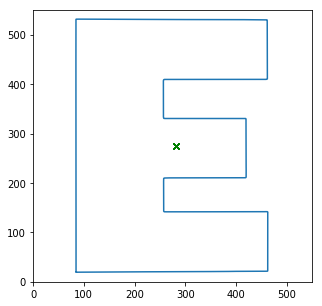

FD components kept: 3


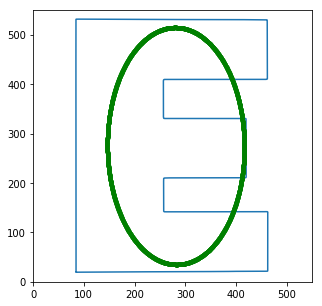

FD components kept: 5


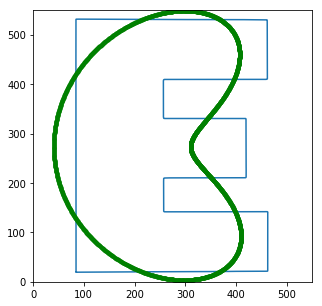

In [46]:
'''
3. Concavity (and the beginning of "order-by-order")

- 0th: Centroid
- 1st: Size (area and ellipticity)
- 2nd: Convavity.

'''

x, y = extract_shape_v0('letterE.jpg')
Z, k, k_lo = FD(x, y)

order = 0
Z_filt, k_filt = filt_FD(Z, k, order*k_lo, no_zeroth = False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure(figsize = (5, 5))
plt.axis((0, 550, 0, 550))
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'gx')
plt.show()

order = 1
Z_filt, k_filt = filt_FD(Z, k, order*k_lo)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure(figsize = (5, 5))
plt.axis((0, 550, 0, 550))
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'g.')
plt.show()

order = 2
Z_filt, k_filt = filt_FD(Z, k, order*k_lo)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure(figsize = (5, 5))
plt.axis((0, 550, 0, 550))
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'g.')
plt.show()

FD components kept: 11


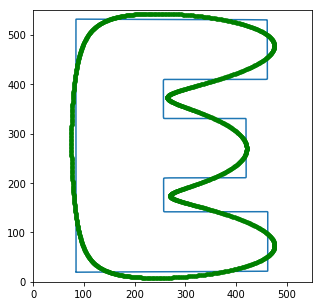

FD components kept: 21


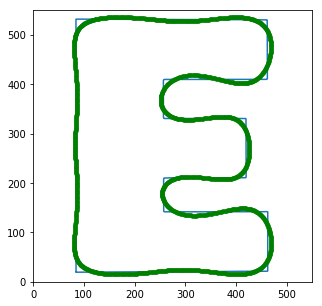

In [38]:
'''
4. Higher Order Terms (and the continuation of "order-by-order")

'''


order = 5
Z_filt, k_filt = filt_FD(Z, k, order*k_lo)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure(figsize = (5, 5))
plt.axis((0, 550, 0, 550))
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'g.')
plt.show()

order = 10
Z_filt, k_filt = filt_FD(Z, k, order*k_lo)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure(figsize = (5, 5))
plt.axis((0, 550, 0, 550))
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'g.')
plt.show()


im shape:  (550, 550)
contour level [ 150.]
number of contour path 1
Average distance bewteen adjacent points:0.9953126687152395
Spatial interval: 0.9953
FD components kept: 21


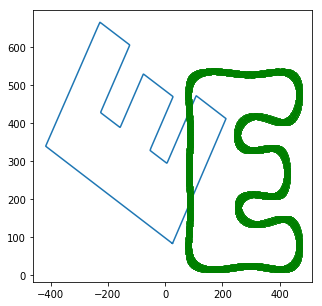

In [39]:
'''
Rotational Invariance.

Multiplying Z[k] by an additional phase factor amounts to rotating the shape. 

'''


x, y = extract_shape_v0('letterE.jpg')
z = x + 1j*y

# rotate shape in configuration space
z *= np.exp(1j*np.pi/3.)

x_pr, y_pr = z.real, z.imag

Z_pr, k_pr, k_lo = FD(x_pr, y_pr)


order = 10
Z_filt, k_filt = filt_FD(Z, k_pr, order*k_lo)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure(figsize = (5, 5))
plt.plot(x_pr, y_pr)
plt.plot(x_rec, y_rec, 'gx')
plt.show()


im shape:  (550, 550)
contour level [ 150.]
number of contour path 1
Average distance bewteen adjacent points:0.9953126687152395
Spatial interval: 0.9953
FD components kept: 21
Average distance bewteen adjacent points:0.9953126687152395
Spatial interval: 0.9953
FD components kept: 21


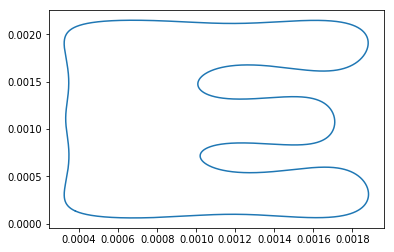

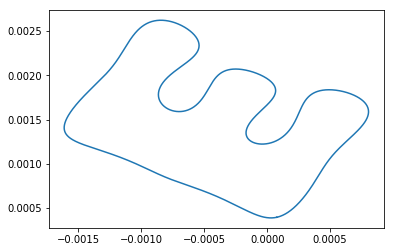

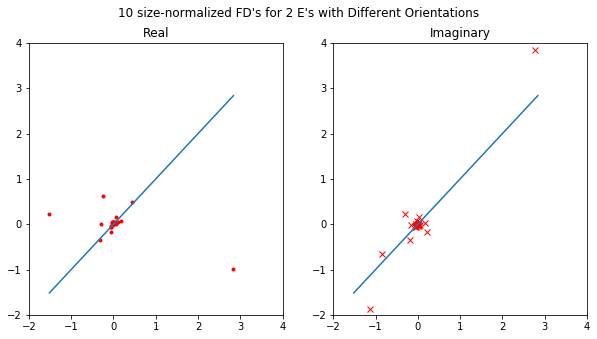

In [40]:
'''
Rotational Invariance.

Multiplying Z[k] by an additional phase factor amounts to rotating the shape...
the two shapes, though identical, would have different FD's.


'''

x, y = extract_shape_v0('letterE.jpg')

order = 10

Z, k, k_lo = FD(x, y)

Z_filt, k_filt = filt_FD(Z, k, order*k_lo)
Z_filt = size_norm(Z_filt)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x_rec, y_rec)


# rotate shape in configuration space
z = x + 1j*y
z_pr = z*np.exp(1j*np.pi/3.)
x_pr, y_pr = z_pr.real, z_pr.imag

Z_pr, k_pr, k_lo = FD(x_pr, y_pr)

order = 10
Z_filt_pr, k_filt = filt_FD(Z_pr, k_pr, order*k_lo)
Z_filt_pr = size_norm(Z_filt_pr)

x_pr_rec, y_pr_rec = recover_shape(Z_filt_pr)

plt.figure()
plt.plot(x_pr_rec, y_pr_rec)
plt.show()

# Clearly the FD would be different for the two E's.
fig = plt.figure(figsize = (10, 5))
plt.suptitle("10 size-normalized FD's for 2 E's with Different Orientations")

# the real part
ax1 = fig.add_subplot(121)
ax1.set_title('Real')
ax1.plot(Z_filt.real, Z_filt_pr.real, 'r.')
# auxiliary x and y for a 45 deg line.
x_aux = np.linspace(Z_filt.real.min(), Z_filt.real.max())
y_aux = x_aux
ax1.plot(x_aux, y_aux)
ax1.axis((-2, 4, -2, 4))


# the imaginary part
ax2 = fig.add_subplot(122)
ax2.set_title('Imaginary')
ax2.plot(Z_filt.imag, Z_filt_pr.imag, 'rx')
ax2.axis((-2, 4, -2, 4))

ax2.plot(x_aux, y_aux)

plt.show()

im shape:  (550, 550)
contour level [ 150.]
number of contour path 1
Average distance bewteen adjacent points:0.9953126687152395
Spatial interval: 0.9953
FD components kept: 21
Average distance bewteen adjacent points:0.9953126687152395
Spatial interval: 0.9953
FD components kept: 21


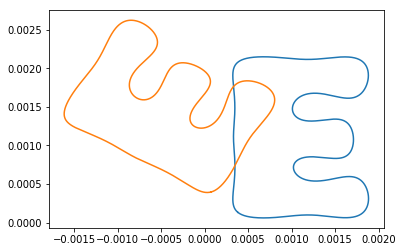

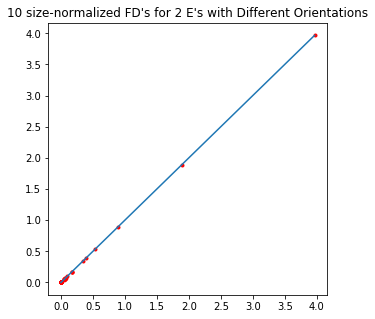

In [41]:
'''
Rotational Invariance.

Multiplying Z[k] by an additional phase factor amounts to rotating the shape...
This means |Z[k]|'s are the same whichever the orientation of the shape may be.

'''


x, y = extract_shape_v0('letterE.jpg')

order = 10

Z, k, k_lo = FD(x, y)
# -----> note the use of the underscore all by itself
Z_filt, _ = filt_FD(Z, k, order*k_lo)
Z_filt = size_norm(Z_filt)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x_rec, y_rec)


# rotate shape in configuration space
z = x + 1j*y
z_pr = z*np.exp(1j*np.pi/3.)
x_pr, y_pr = z_pr.real, z_pr.imag
Z_pr, k_pr, k_lo = FD(x_pr, y_pr)

Z_filt_pr, _ = filt_FD(Z_pr, k_pr, order*k_lo)
Z_filt_pr = size_norm(Z_filt_pr)

x_rec, y_rec = recover_shape(Z_filt_pr)
plt.plot(x_rec, y_rec)
plt.show()

# But the |FD| are the same.  We thus have achieved rotational invariance!
plt.figure(figsize = (5, 5))
plt.title("10 size-normalized FD's for 2 E's with Different Orientations")
Z_filt_mag = np.abs(Z_filt)
Z_filt_pr_mag = np.abs(Z_filt_pr)
plt.plot(Z_filt_mag, Z_filt_pr_mag, 'r.')

x_aux = np.linspace(Z_filt_mag.min(), Z_filt_mag.max())
y_aux = x_aux
plt.plot(x_aux, y_aux)

plt.show()

## Breakout 4: Write a function get_FD_abs(x, y, order = 10, norm = True)

- ### It should return fd_mag, k_kept, x_rec, y_rec
- ### Apply it to the letter E, and plot the recovered shape and plot fd_mag against k_kept.


## End of week11-2